In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


Dataset: https://www.kaggle.com/c/titanic/data


Survival - Survival (0 = No; 1 = Yes). Not included in test.csv file.

Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

Name - Name

Sex - Sex

Age - Age

Sibsp - Number of Siblings/Spouses Aboard

Parch - Number of Parents/Children Aboard

Ticket - Ticket Number

Fare - Passenger Fare

Cabin - Cabin

Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


In [14]:
# configurations for the plt plots
plt.rcParams['figure.figsize']=[6,3]
plt.rcParams['figure.dpi']=80
plt.style.use('ggplot')

In [4]:
# load the dataset

In [7]:
titanic = sns.load_dataset('titanic')

In [8]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [10]:
cols = titanic.columns
cols

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [11]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [13]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

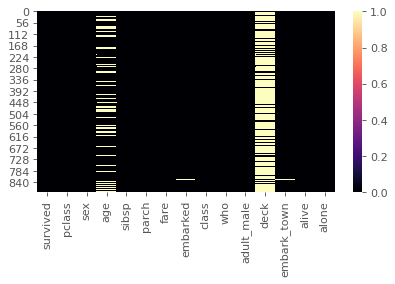

In [17]:
sns.heatmap(titanic.isnull(), cmap='magma', cbar= True)

In [18]:
cormat = titanic.corr()
cormat

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


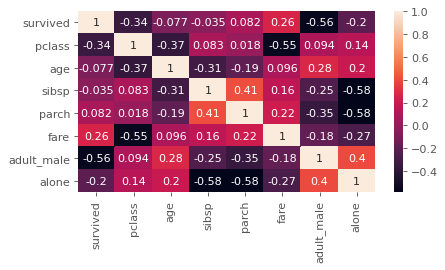

In [19]:
sns.heatmap(cormat, annot=True)

In [20]:
# Univariate analysis for the columns

In [21]:
print(list(cols))

['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']


/home/shane/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/shane/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/shane/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/shane/a

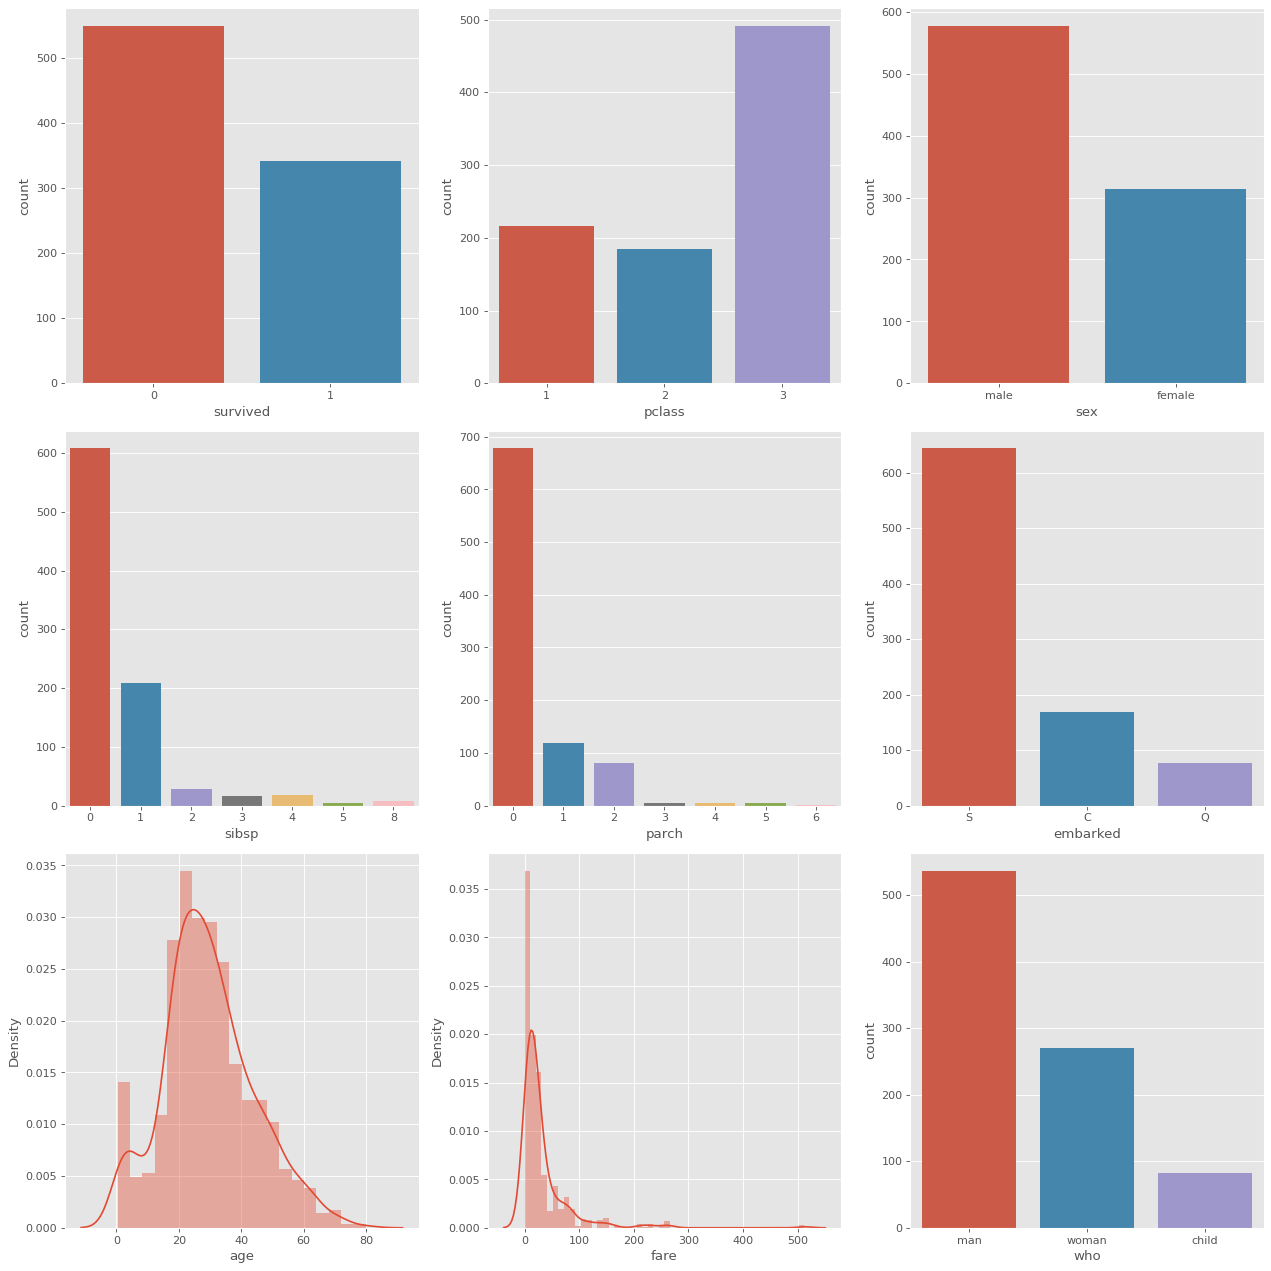

In [29]:
fig, ax=plt.subplots(3, 3, figsize=(16,16))
sns.countplot('survived', data= titanic, ax= ax[0][0])
sns.countplot('pclass', data= titanic, ax= ax[0][1])
sns.countplot('sex', data= titanic, ax= ax[0][2])
sns.countplot('sibsp', data= titanic, ax= ax[1][0])
sns.countplot('parch', data= titanic, ax= ax[1][1])
sns.countplot('embarked', data= titanic, ax= ax[1][2])
sns.distplot(titanic['age'], kde= True, ax= ax[2][0])
sns.distplot(titanic['fare'], kde= True, ax= ax[2][1])
sns.countplot('who', data= titanic, ax= ax[2][2])
plt.tight_layout()

In [30]:
# class by class analysis

In [31]:
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

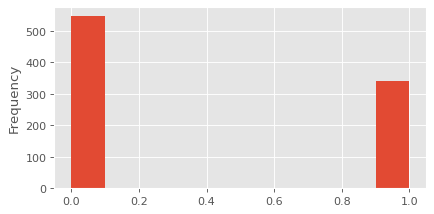

In [32]:
titanic['survived'].plot.hist()

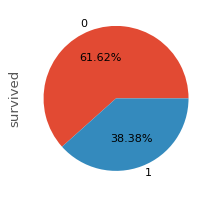

In [37]:
titanic['survived'].value_counts().plot.pie(autopct='%1.2f%%')

In [38]:
# Pclass eda

In [40]:
titanic['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [41]:
titanic.groupby(['pclass', 'survived'])['survived'].count()

pclass  survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: survived, dtype: int64

In [42]:
titanic.groupby(['survived', 'pclass'])['survived'].count()

survived  pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
Name: survived, dtype: int64

In [43]:
titanic.groupby(['survived', 'pclass'])['pclass'].count()

survived  pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
Name: pclass, dtype: int64

/home/shane/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


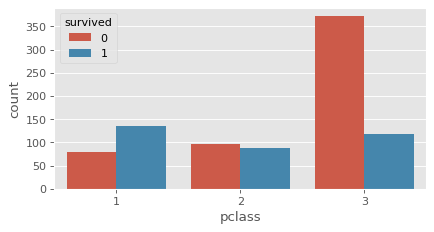

In [45]:
sns.countplot('pclass', data= titanic, hue='survived')

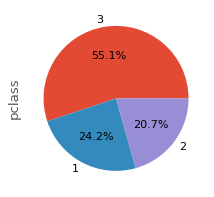

In [46]:
titanic['pclass'].value_counts().plot.pie(autopct='%1.1f%%')

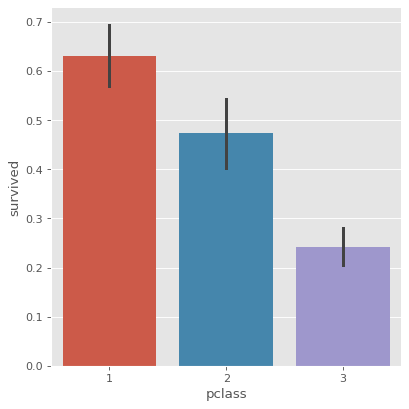

In [47]:
sns.catplot(x='pclass', y='survived', kind='bar', data=titanic)

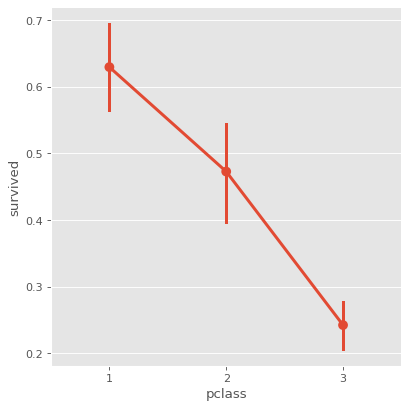

In [49]:
sns.catplot(x='pclass', y = 'survived', data= titanic, kind='point')

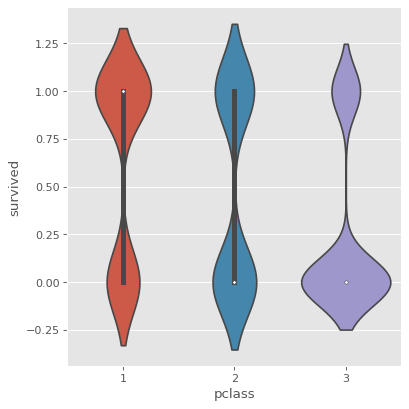

In [50]:
sns.catplot(x='pclass', y='survived', kind='violin', data=titanic)

In [51]:
# Gender on the survival

In [52]:
titanic['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [54]:
titanic.groupby(['sex', 'survived'])['survived'].count()

sex     survived
female  0            81
        1           233
male    0           468
        1           109
Name: survived, dtype: int64

/home/shane/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


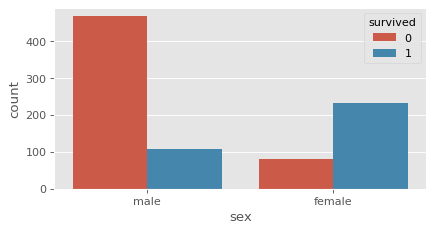

In [55]:
sns.countplot('sex', data=titanic, hue='survived')

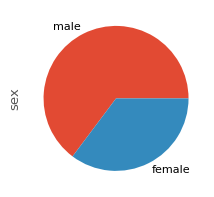

In [57]:
titanic['sex'].value_counts().plot.pie()

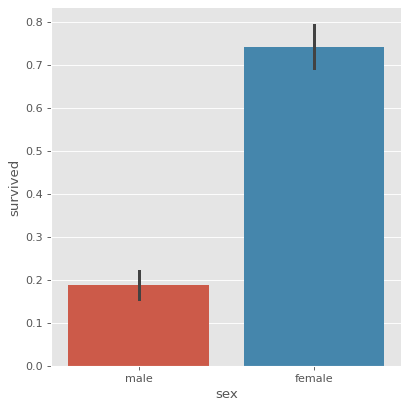

In [61]:
sns.catplot(x='sex', y='survived', data=titanic, kind='bar')

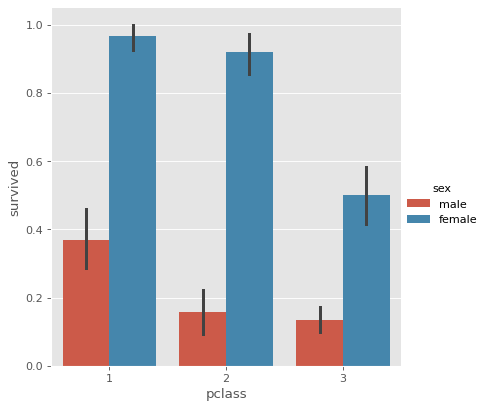

In [62]:
sns.catplot(x='pclass', y='survived', data=titanic, kind='bar', hue='sex')

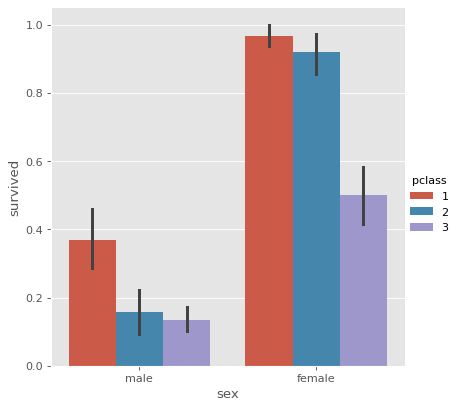

In [63]:
sns.catplot(x='sex', y='survived', data=titanic, kind='bar', hue='pclass')

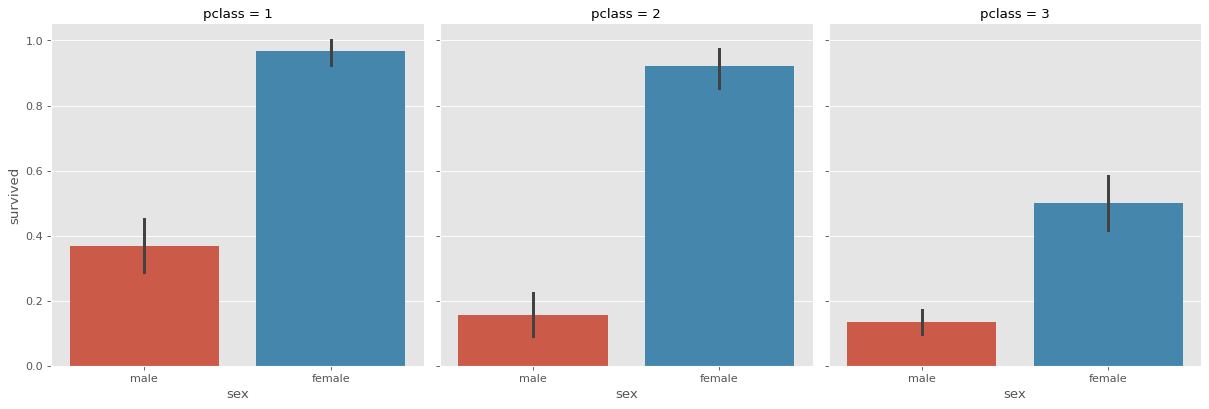

In [64]:
sns.catplot(x='sex', y='survived', data=titanic, kind='bar', col='pclass')

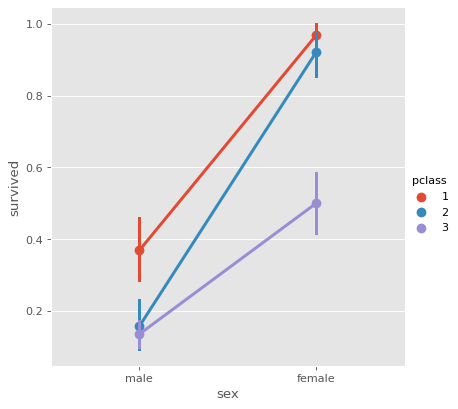

In [66]:
sns.catplot(x='sex', y='survived', kind='point', data=titanic, hue='pclass')

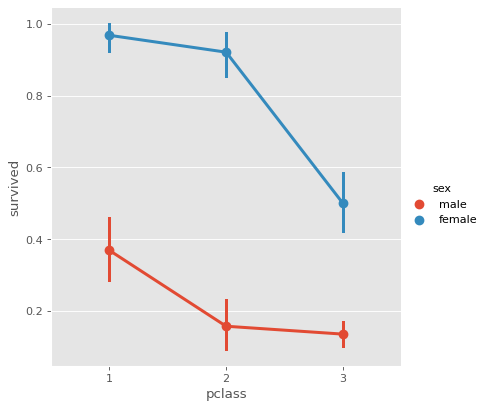

In [67]:
sns.catplot(x='pclass', y='survived', kind='point', data=titanic, hue='sex')

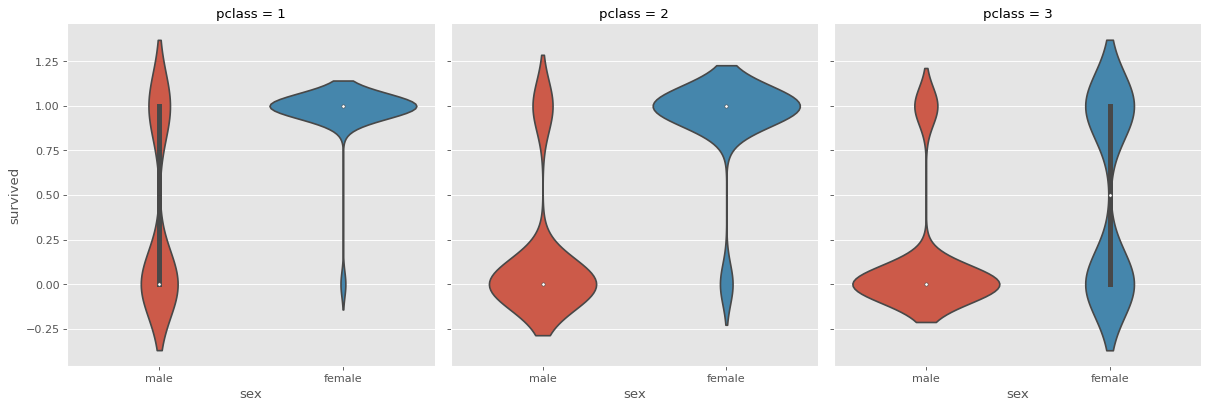

In [71]:
sns.catplot(x='sex', y= 'survived', kind='violin', data=titanic, col='pclass')

In [72]:
# as age is cotinuous no catplot is possible

Text(0.5, 0, 'age')

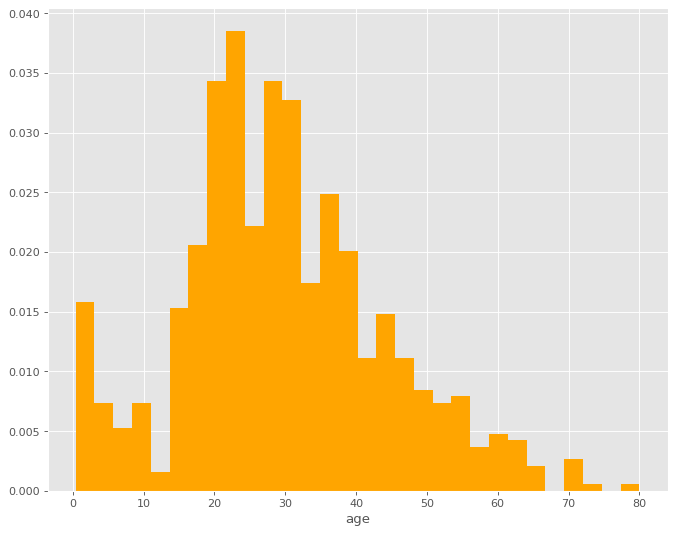

In [75]:
titanic['age'].hist(bins=30, density=True, color='orange', figsize=(10,8))
plt.xlabel('age')

/home/shane/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


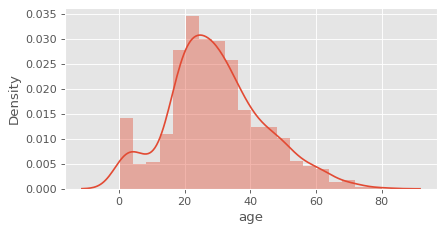

In [76]:
sns.distplot(titanic['age'])

/home/shane/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


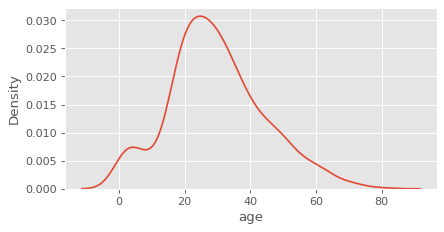

In [78]:
sns.distplot(titanic['age'], hist=False)

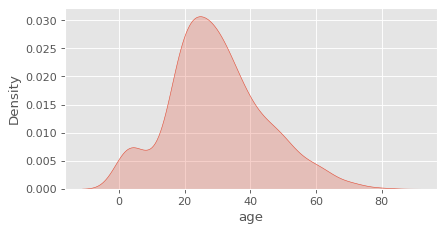

In [79]:
sns.kdeplot(titanic['age'], shade=True)

In [80]:
# using box plots

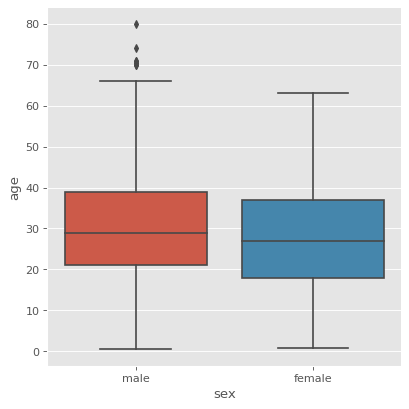

In [81]:
sns.catplot(x='sex', y='age', kind='box', data=titanic)

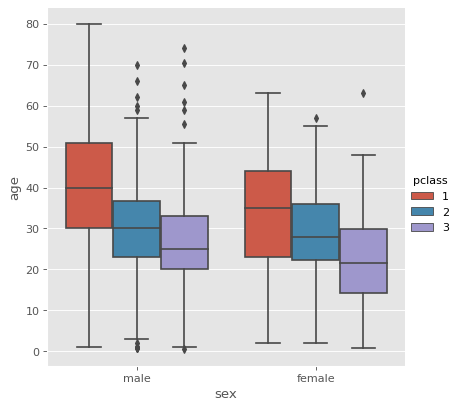

In [82]:
sns.catplot(x='sex', y='age', kind='box', data=titanic, hue='pclass')

In [83]:
# using violin plot

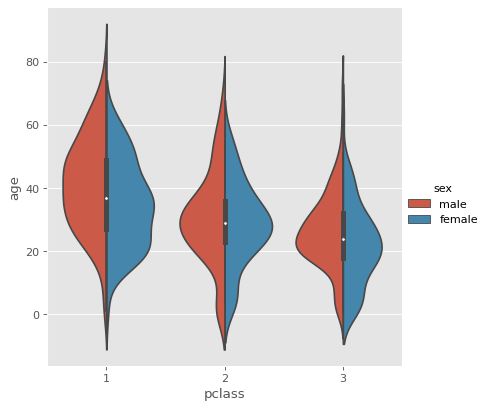

In [87]:
sns.catplot(x='pclass', y='age', data=titanic, kind='violin', hue='sex', split=True
           )

/home/shane/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 13.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


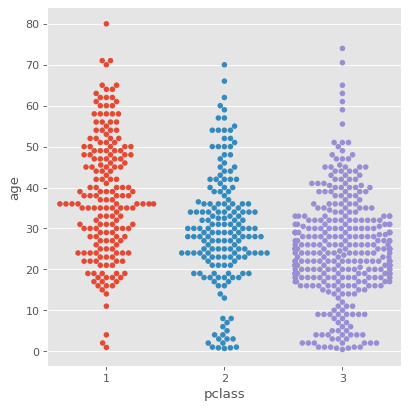

In [89]:
sns.catplot(x='pclass', y='age', kind='swarm', data=titanic)

/home/shane/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 13.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


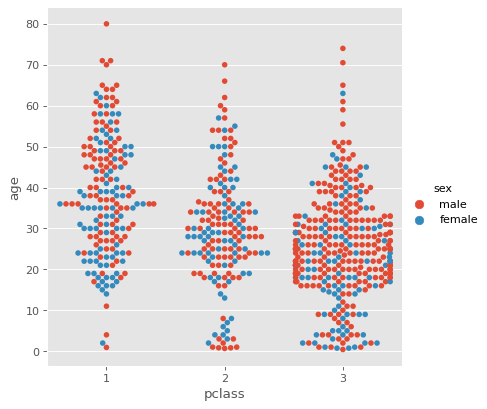

In [90]:
sns.catplot(x='pclass', y='age', kind='swarm', data=titanic, hue='sex')

/home/shane/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 6.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


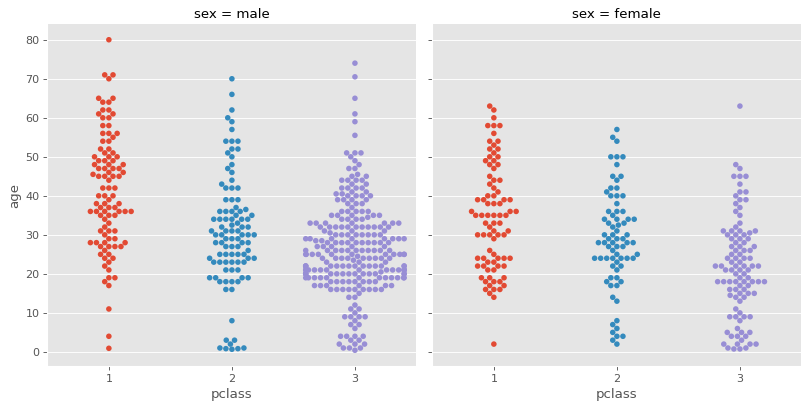

In [92]:
sns.catplot(x='pclass', y='age', kind='swarm', data=titanic, col='sex')

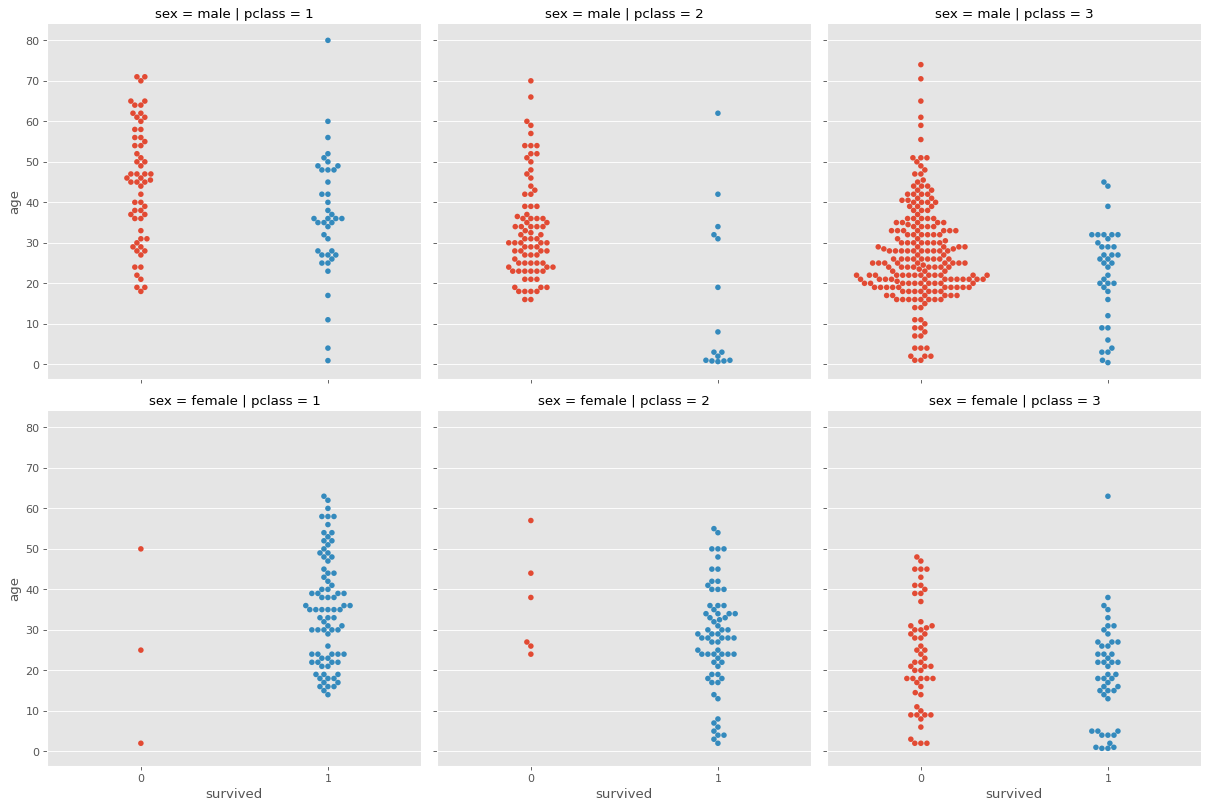

In [95]:
sns.catplot(x='survived', y='age', kind='swarm', data=titanic, row='sex', col='pclass')

In [96]:
# fare analysis of the titanic data set

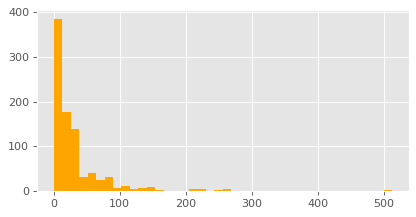

In [97]:
titanic['fare'].hist(bins=40, color='orange')

/home/shane/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


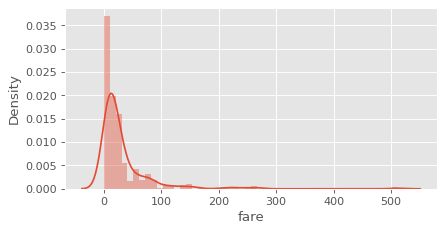

In [98]:
sns.distplot(titanic['fare'])


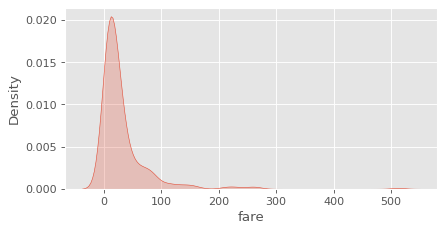

In [100]:
sns.kdeplot(titanic['fare'], shade=True)

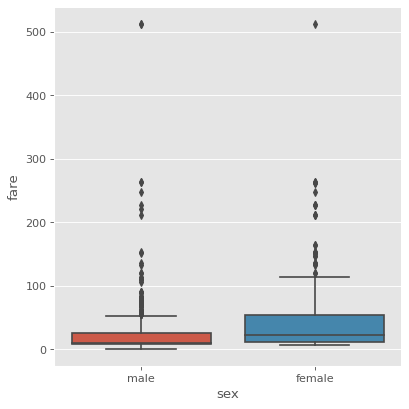

In [101]:
sns.catplot(x='sex', y='fare', data=titanic, kind='box')

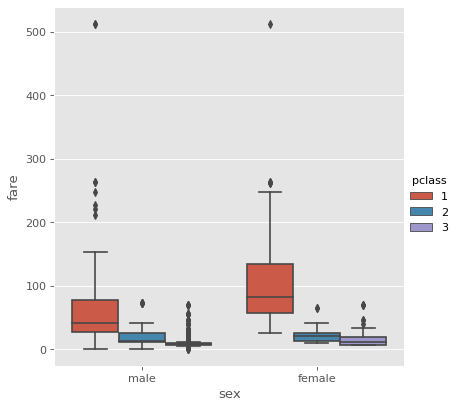

In [102]:
sns.catplot(x='sex', y='fare', data=titanic, kind='box', hue='pclass')

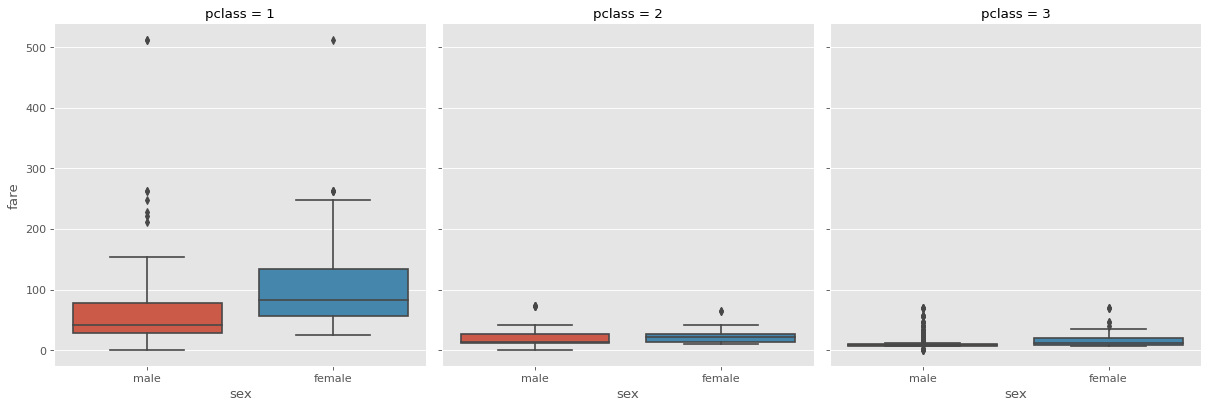

In [103]:
sns.catplot(x='sex', y='fare', data=titanic, kind='box', col='pclass')

/home/shane/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 32.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/shane/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 20.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/shane/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 71.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/shane/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 48.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


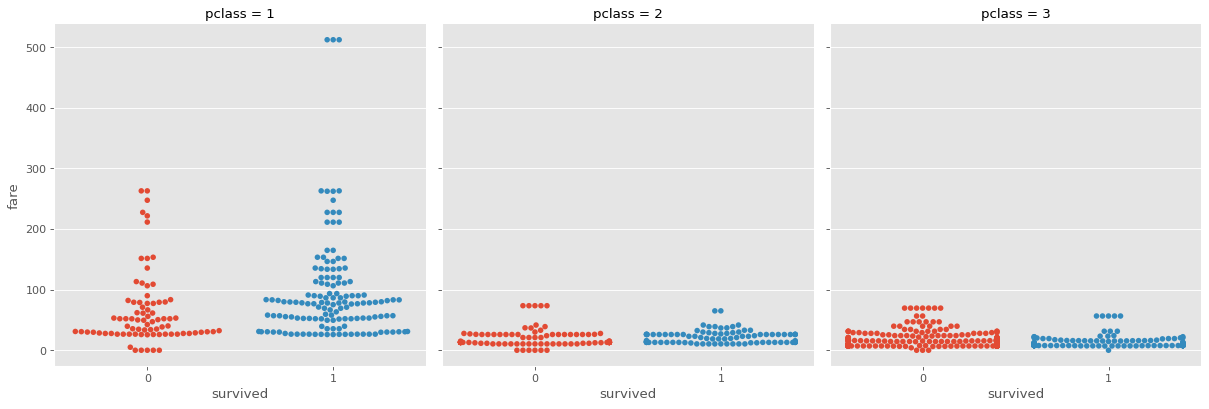

In [105]:
sns.catplot(x='survived', y='fare', kind='swarm', data=titanic,  col='pclass')

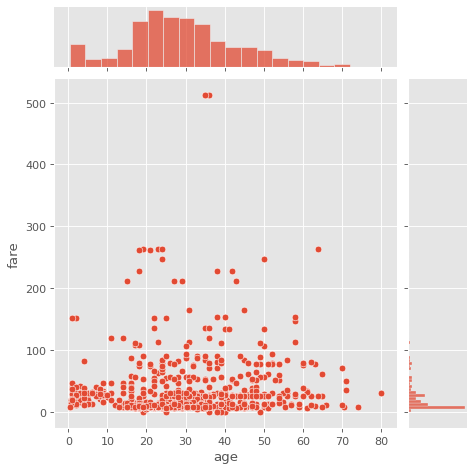

In [106]:
sns.jointplot(x='age', y='fare', data=titanic)

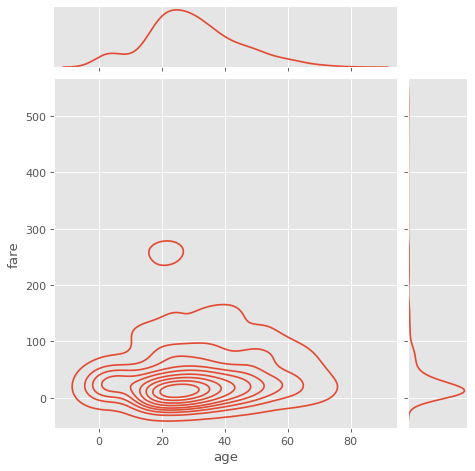

In [107]:
sns.jointplot(x='age', y='fare', kind='kde', data= titanic)

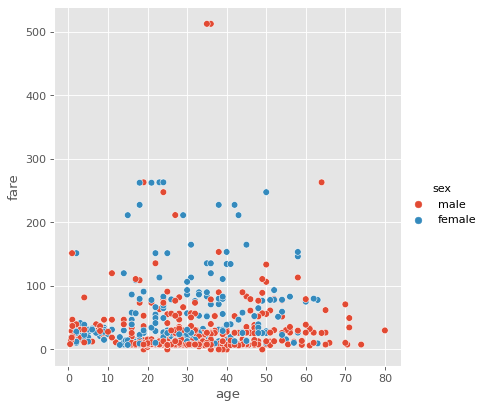

In [109]:
sns.relplot(x='age', y='fare', data= titanic, hue='sex')

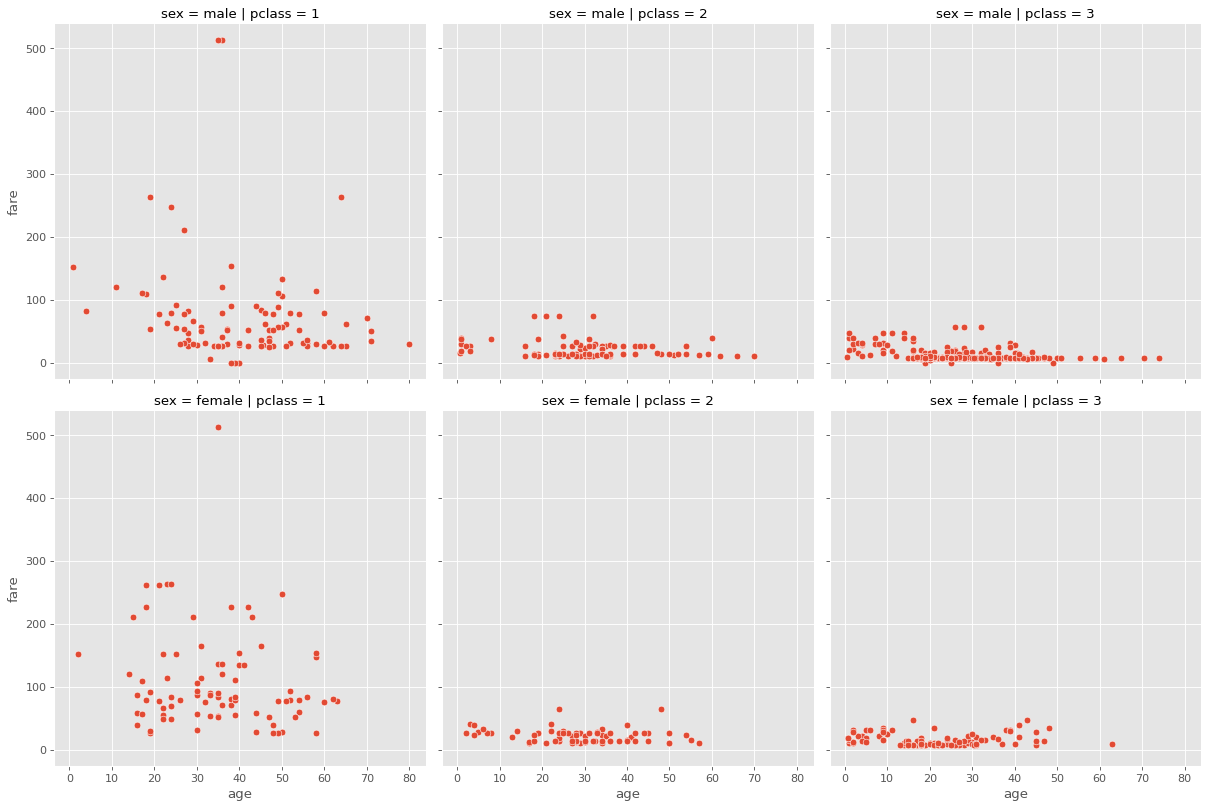

In [110]:
sns.relplot(x='age', y='fare', data= titanic, row='sex', col='pclass')

In [111]:
# sibsp

In [112]:
titanic['sibsp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

/home/shane/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


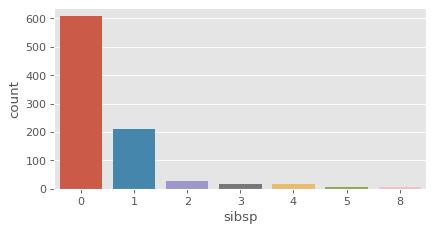

In [113]:
sns.countplot('sibsp', data=titanic)

/home/shane/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


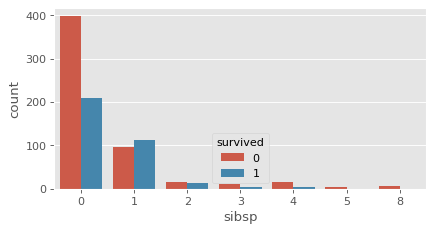

In [114]:
sns.countplot('sibsp', data=titanic, hue='survived')

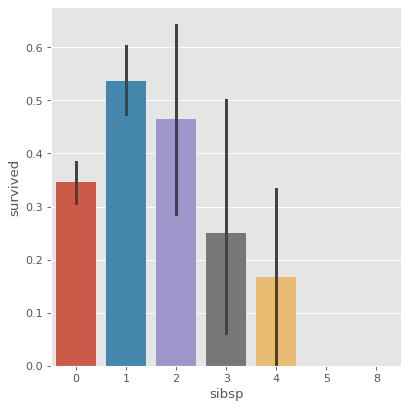

In [117]:
sns.catplot(x='sibsp', y='survived',data=titanic, kind='bar')

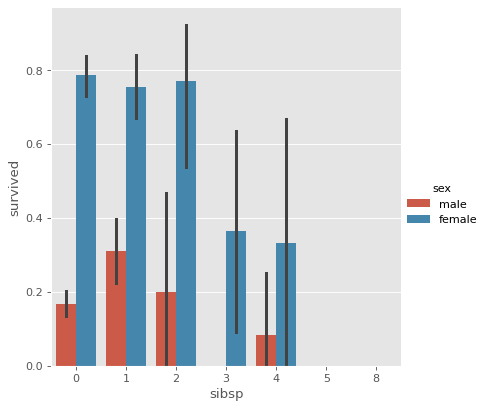

In [118]:
sns.catplot(x='sibsp', y='survived',data=titanic, kind='bar', hue='sex')

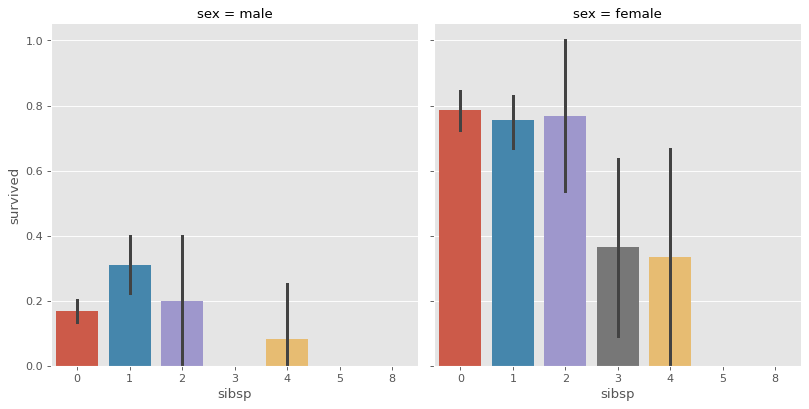

In [119]:
sns.catplot(x='sibsp', y='survived',data=titanic, kind='bar', col='sex')

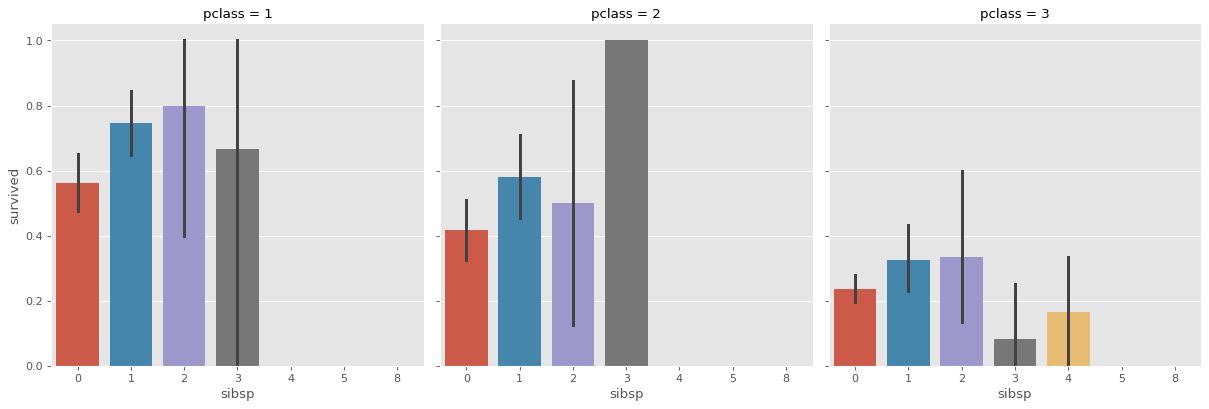

In [120]:
sns.catplot(x='sibsp', y='survived',data=titanic, kind='bar', col='pclass')

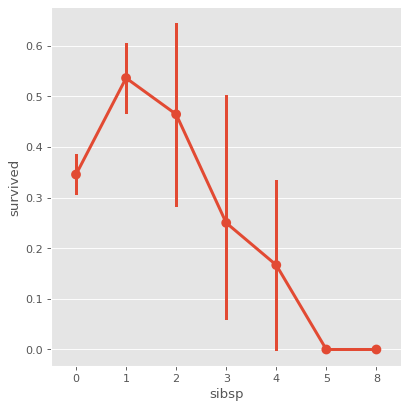

In [122]:
sns.catplot(x='sibsp', y='survived', data=titanic, kind='point')

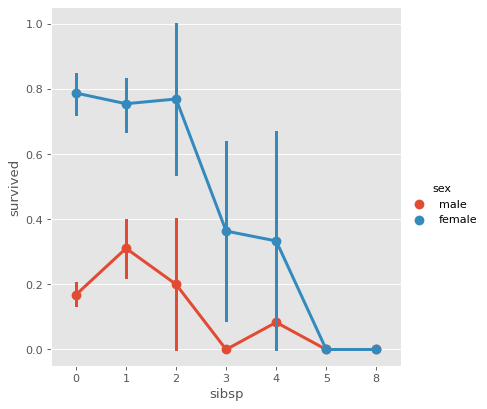

In [124]:
sns.catplot(x='sibsp', y='survived', data=titanic, kind='point', hue='sex')
# survival probability

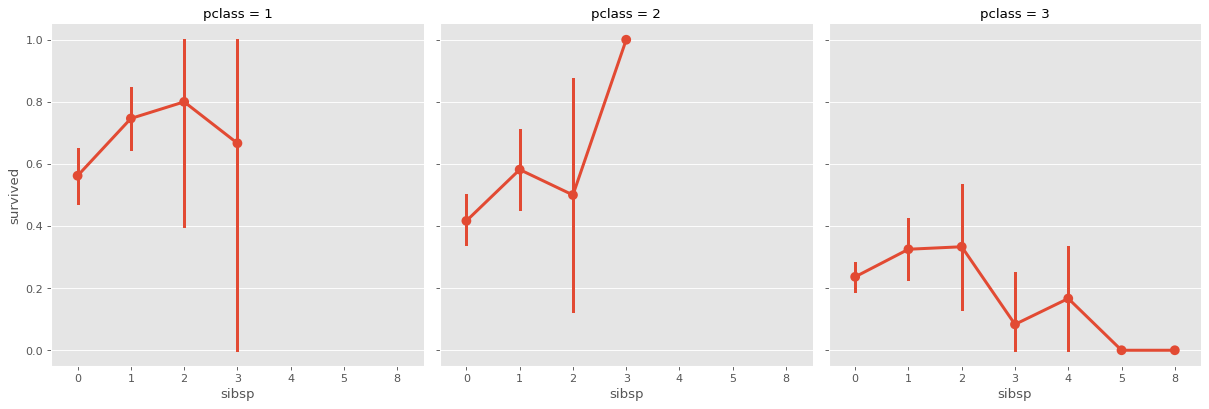

In [126]:
sns.catplot(x='sibsp', y='survived', data=titanic, kind='point', col='pclass')

/home/shane/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 84.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/shane/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 48.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/shane/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 64.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/shane/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 37.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/shane/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:129

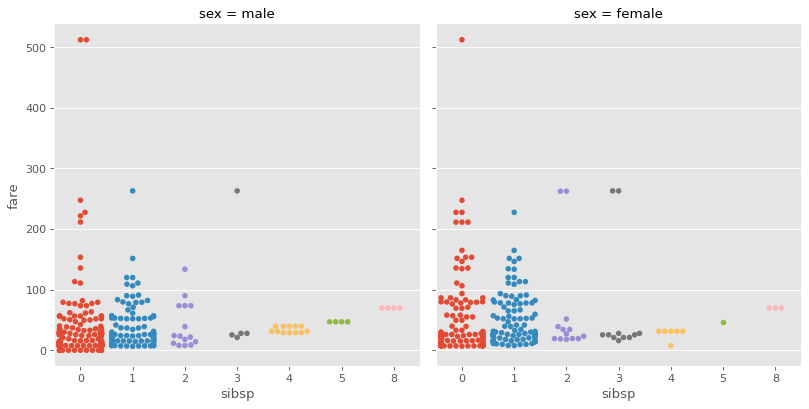

In [128]:
sns.catplot(x='sibsp', y='fare', data=titanic, kind='swarm', col='sex')

/home/shane/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 46.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/shane/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 31.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/shane/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 77.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/shane/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 56.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/shane/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:129

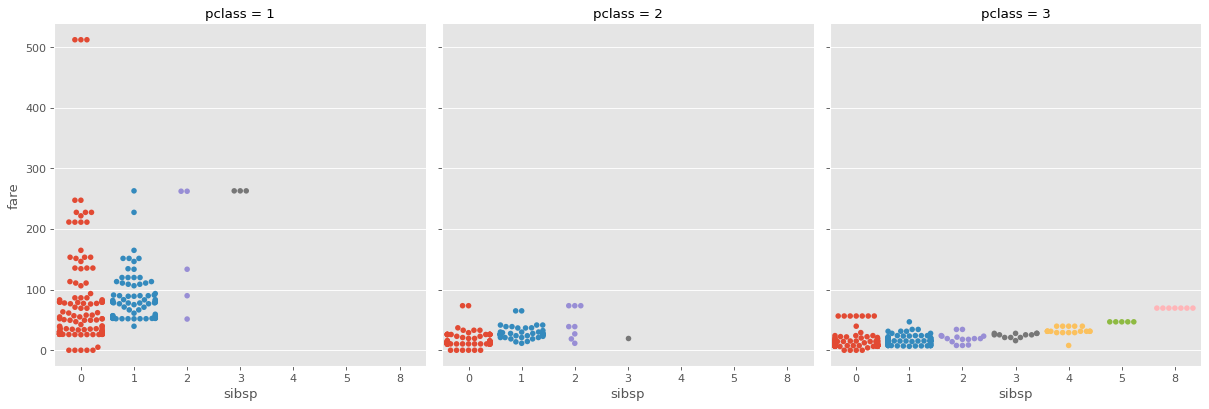

In [129]:
sns.catplot(x='sibsp', y='fare', data=titanic, kind='swarm', col='pclass')

/home/shane/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 46.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/shane/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 16.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/shane/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 69.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/shane/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 37.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/shane/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:129

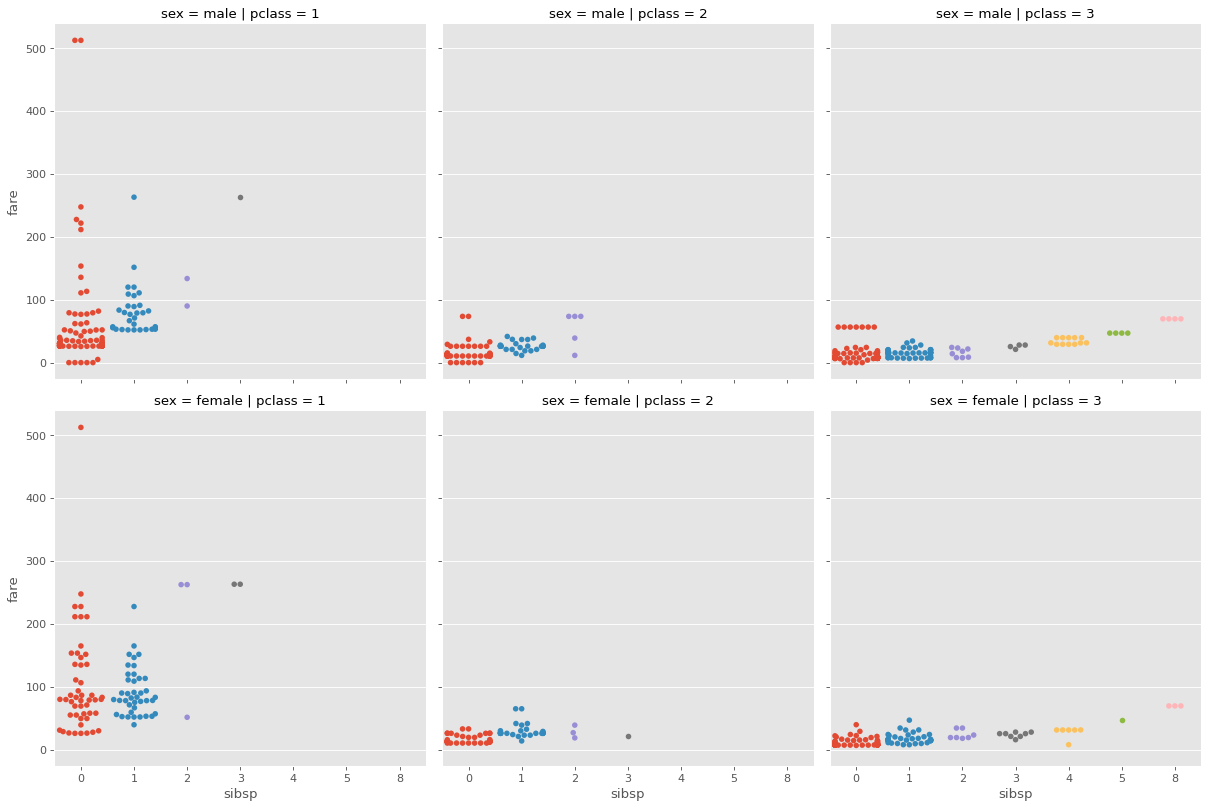

In [130]:
sns.catplot(x='sibsp', y='fare', data=titanic, kind='swarm', row='sex', col='pclass')

In [131]:
# parch

In [132]:
titanic['parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

/home/shane/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


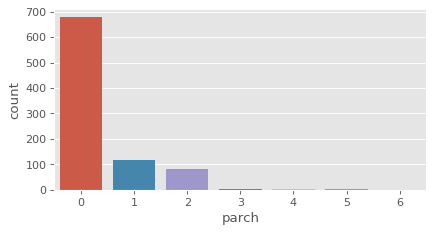

In [133]:
sns.countplot('parch', data=titanic)

/home/shane/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


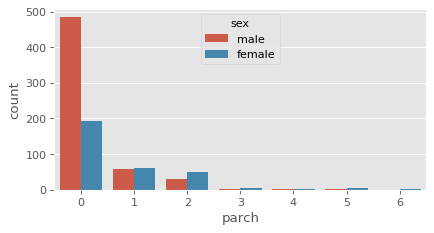

In [134]:
sns.countplot('parch', data=titanic, hue='sex')

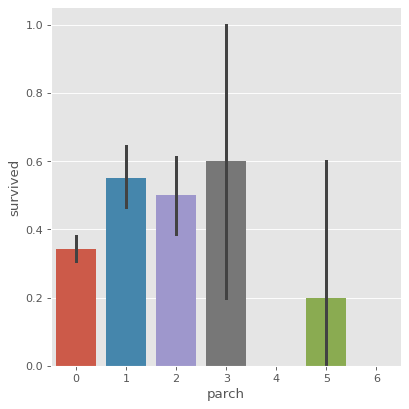

In [135]:
sns.catplot(x='parch',y='survived', data=titanic, kind='bar')

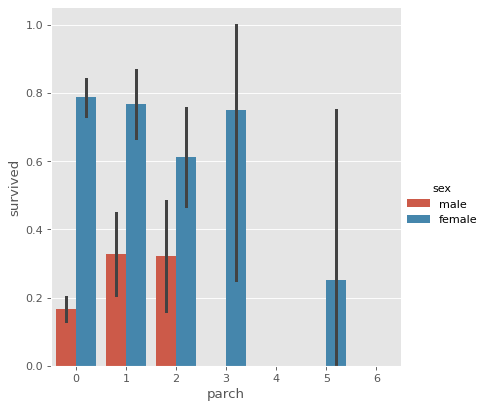

In [136]:
sns.catplot(x='parch',y='survived', data=titanic, kind='bar', hue='sex')

/home/shane/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 86.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/shane/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 52.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/shane/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 31.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


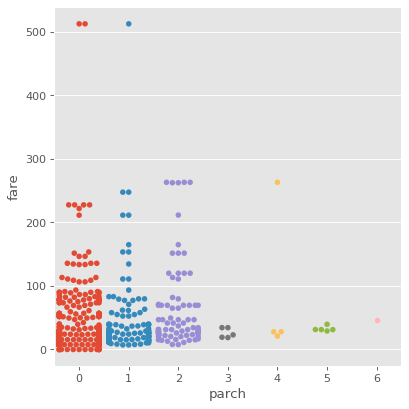

In [137]:
sns.catplot(x='parch', y='fare', data=titanic, kind='swarm')

/home/shane/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 86.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/shane/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 29.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/shane/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 6.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/shane/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 64.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/shane/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296

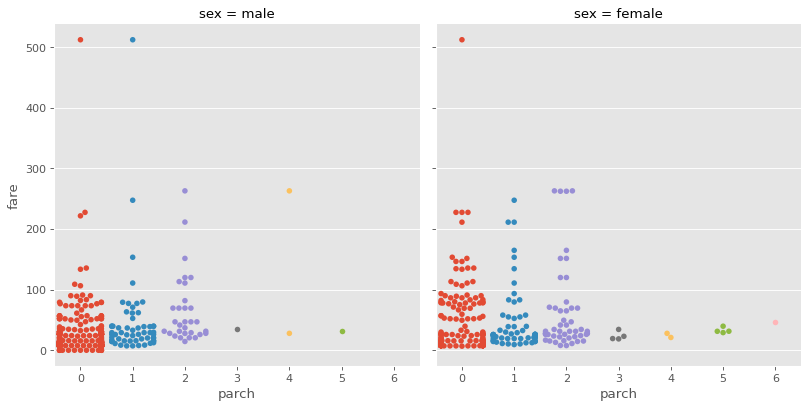

In [138]:
sns.catplot(x='parch', y='fare', data=titanic, kind='swarm', col='sex')

/home/shane/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 77.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/shane/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 60.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/shane/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 15.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/shane/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 63.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/shane/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:129

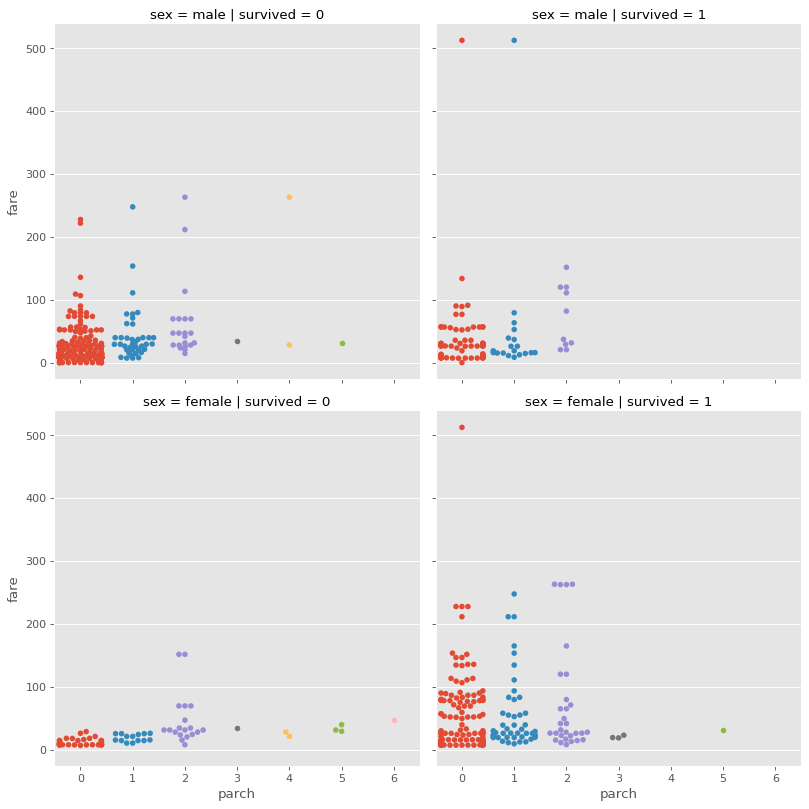

In [139]:
sns.catplot(x='parch', y='fare', data=titanic, kind='swarm', row='sex', col='survived')

In [140]:
# Embarked

In [141]:
titanic['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

/home/shane/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


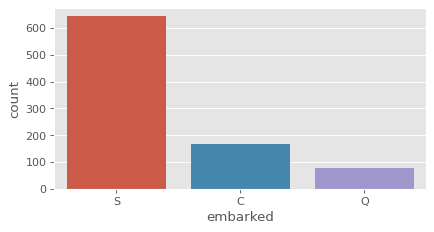

In [142]:
sns.countplot('embarked', data=titanic)

/home/shane/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


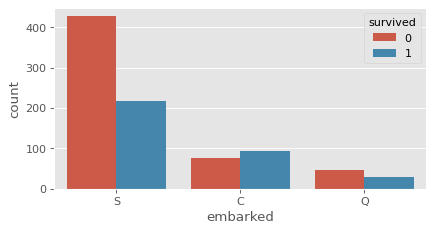

In [143]:
sns.countplot('embarked', data=titanic,hue='survived')

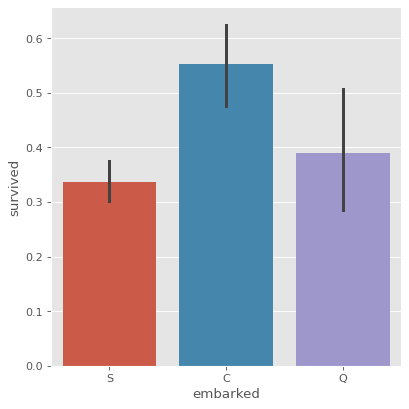

In [144]:
sns.catplot(x='embarked', y='survived', kind='bar', data=titanic)

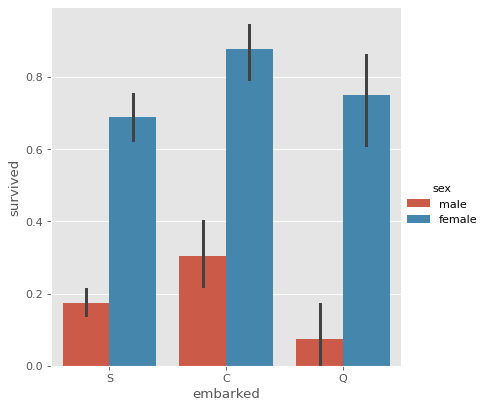

In [145]:
sns.catplot(x='embarked', y='survived', kind='bar', data=titanic, hue='sex')

In [146]:
titanic['who'].value_counts()

man      537
woman    271
child     83
Name: who, dtype: int64

/home/shane/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


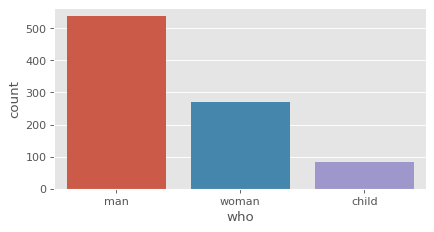

In [147]:
sns.countplot('who', data=titanic)

/home/shane/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


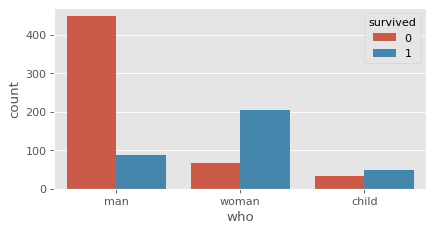

In [148]:
sns.countplot('who', data=titanic, hue='survived')

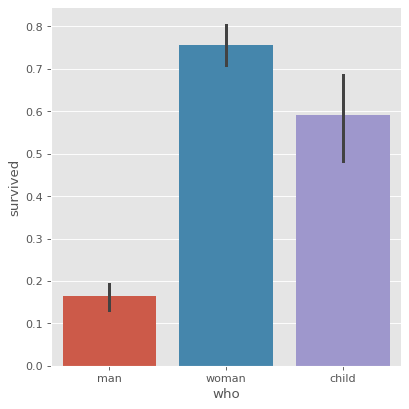

In [150]:
sns.catplot(x='who', y='survived', kind='bar', data= titanic)

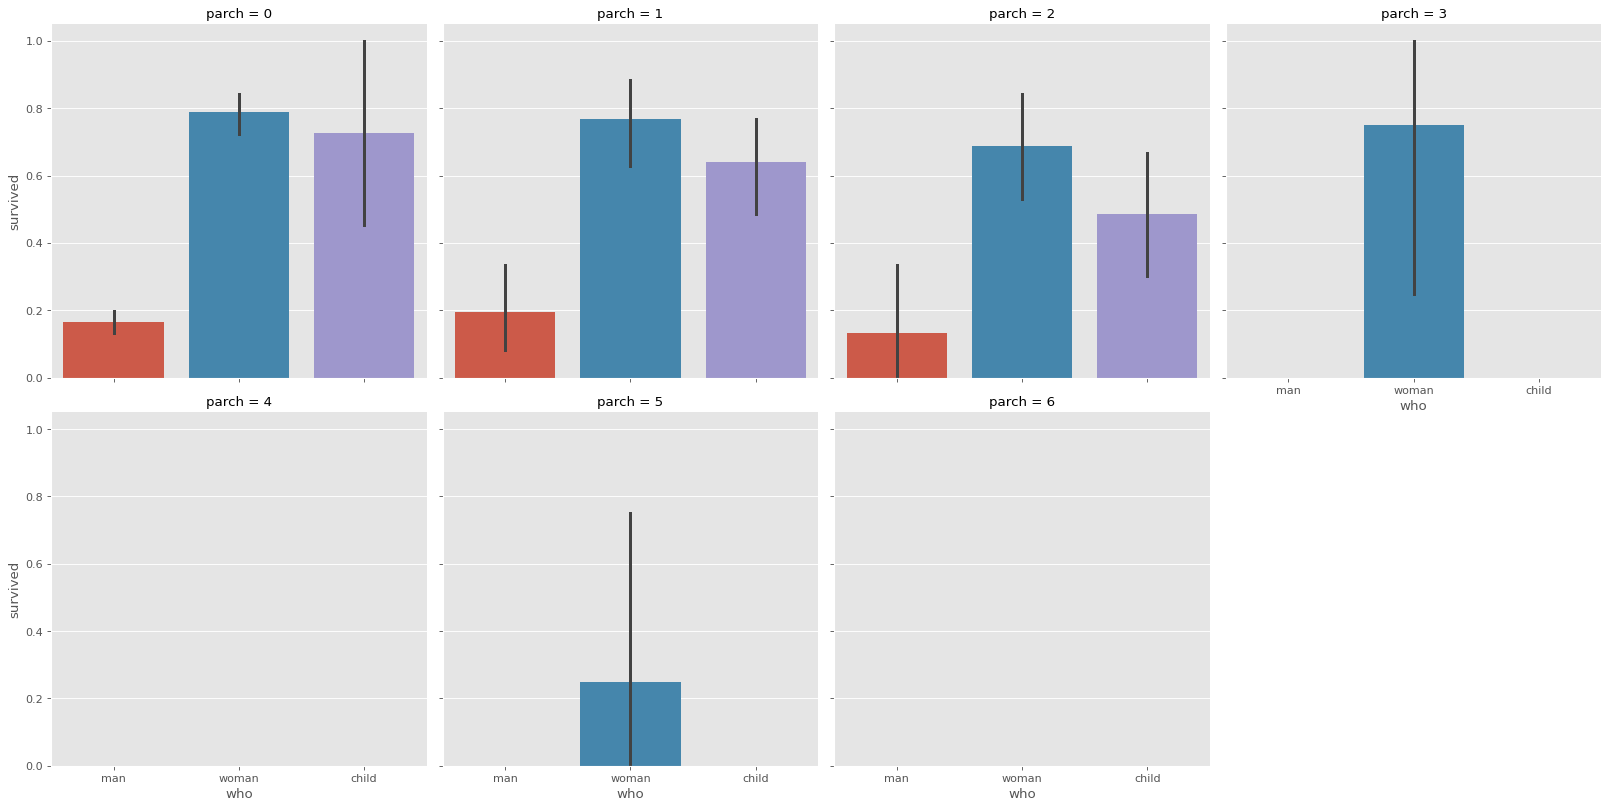

In [151]:
sns.catplot(x='who', y='survived', kind='bar', data= titanic, col='parch',col_wrap = 4)